# Lista de Exercício 8
### Introdução à Visão Computacional (SEL0339/SEL5886)

**Instruções:**

 1. Esta lista consiste de 5 exercícios.
 1. Deve-se colocar comentários nos códigos desenvolvidos.
 1. As perguntas devem ser respondidas também como comentários no arquivo.
 1. Colocar seu nome e número USP abaixo.
 1. Quaisquer problemas na execução das listas, entrar em contato com os monitores.
 1. Depois de terminado os exercícios, deve ser gerado um arquivo **extensão .ipynb** para ser enviado ao professor pelo E-DISCIPLINAS da disciplina até a data máxima de entrega.
 1. Caso não seja enviado, o aluno ficará sem nota.


---



 <table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/LAVI-USP/SEL0339-SEL5886_2021/blob/main/praticas/Lista_de_Exercicio_8.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Executar no Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/LAVI-USP/SEL0339-SEL5886_2021/blob/main/praticas/Lista_de_Exercicio_8.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />Ver codigo fonte no GitHub</a>
  </td>
</table>


`Nome: Murilo Henrique Pasini Trevisan `

`Número USP: 9796078 `

### Introdução:


Vamos importar as bibliotecas que iremos utilizar:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
##from skimage.filters import threshold_otsu
##from skimage.filters import try_all_threshold

#### **Atenção**: os códigos abaixo são para fazer o download das imagens (EXECUTE-OS). Os mesmos não fazem parte dessa prática. 

In [ ]:
import urllib.request

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2021/raw/main/imagens/pratica_08/cores.jpeg", "cores.jpeg")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2021/raw/main/imagens/pratica_08/abobora_ruidosa.tif", "abobora_ruidosa.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2021/raw/main/imagens/pratica_08/abobora.tif", "abobora.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2021/raw/main/imagens/pratica_08/sudoku.tif", "sudoku.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2021/raw/main/imagens/pratica_08/moedas.tif", "moedas.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")



### 1) Binarização (*Thresholding*) manual

<center><img src="https://github.com/LAVI-USP/SEL0339-SEL5886_2021/raw/main/imagens/pratica_08/moedas_.png" width="256" height="256"></center>

<center><caption><b> Figura 1:</b> Imagem moedas.tif.</b></caption></center>

**Exercício:**

1. Binarizar a imagem `moedas.tif` utilizando o limiar de 32, 128 e 224 da escala de cinza;

2. Binarizar a mesma imagem pelo método do vale. Mostrar o histograma equivalente para escolher o melhor valor de limiar e justifique a sua escolha;

3. Binarizar a mesma imagem utilizando o método de Otsu;

4. Qual a diferença entre as 3 metodologias? Conclua e comente os resultados. Mostre todos os resultados utilizando `subplots`.


<details>    
<summary>
    <font size="3" color="darkblue"><b>Dicas:</b></font>
</summary>

*  Você pode utilizar a função [cv.threshold](https://docs.opencv.org/master/d7/d1b/group__imgproc__misc.html#gae8a4a146d1ca78c626a53577199e9c57) para a binarização com limiares pré-estabelecidos ou para o método de Otsu. Você também pode utilizar a função [threshold_otsu](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.threshold_otsu) da biblioteca `skimage` ([Exemplo](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_thresholding.html)).

*Ex:*
``` python
# Global thresholding
ret1,th1 = cv.threshold(myImg,thresh,maxVal,cv.THRESH_BINARY_INV)
# Otsu's thresholding
ret2,th2 = cv.threshold(myImg,0,maxVal,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
```

O valor de threshold calculado pelo método de otsu foi 208.0


Text(0.5, 1.0, 'Otsu')

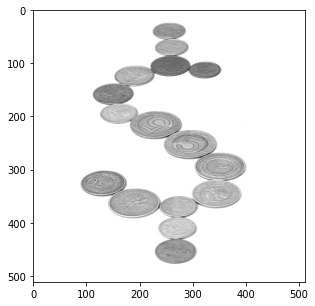

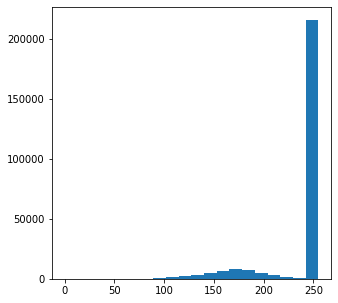

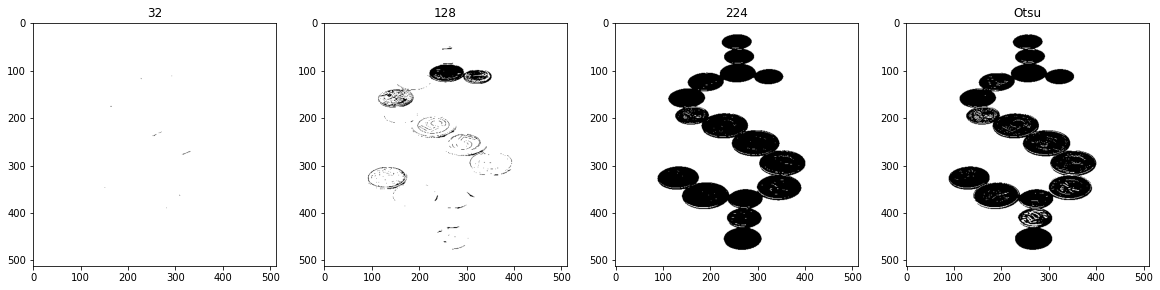

In [ ]:
## -- Seu código começa AQUI -- ##

moeda = cv.imread("moedas.tif", cv.IMREAD_GRAYSCALE)

plt.figure(figsize = (5,5))
plt.imshow(moeda, cmap="gray")

plt.figure(figsize = (5,5))
histograma = plt.hist( moeda.flatten(), bins=20, range=(0,255))

(thresh, moeda_1) = cv.threshold(moeda, 32, 255, cv.THRESH_BINARY)
(thresh, moeda_2) = cv.threshold(moeda, 128, 255, cv.THRESH_BINARY)
(thresh, moeda_3) = cv.threshold(moeda, 224, 255, cv.THRESH_BINARY)
(thresh_otsu, moeda_4) = cv.threshold(moeda, 224, 255, cv.THRESH_OTSU)

print('O valor de threshold calculado pelo método de otsu foi ' + str(thresh_otsu))

plt.figure(figsize = (20,20))
plt.subplot(1,4,1)
plt.imshow(moeda_1, cmap="gray")
plt.title("32")

plt.subplot(1,4,2)
plt.imshow(moeda_2, cmap="gray")
plt.title("128")

plt.subplot(1,4,3)
plt.imshow(moeda_3, cmap= "gray")
plt.title("224")

plt.subplot(1,4,4)
plt.imshow(moeda_4, cmap= "gray")
plt.title("Otsu")

##A partir do histograma pelo método do vale, nota-se que o ponto de threshold 
##para separar a imagem seria de 220, como nota-se nas imagens, com os diferentes
##Valores de threshold manuais, o que obteve melhor resultado de separar o fundo
##da imagem foi o que esteve em 224, como mostrado pelo histograma.

##Nota-se que o valor de threshold calculado pelo método de Otsu foi de 208
##impresso como saída deste programa, o que demonstra que o valor mostrado no 
##histograma, assim como os testes manuais e o método de Otsu convergiram para
##Valores semelhantes, com a diferença na forma em que foram realizados

##Método da skiimage para testar vários algoritmos de threshold
##fig, axes = try_all_threshold(moeda, figsize=(10,10))
##plt.show()

## -- Seu código começa AQUI -- ##

### 2) Influência da iluminação na segmentação

<center><img src="https://github.com/LAVI-USP/SEL0339-SEL5886_2021/raw/main/imagens/pratica_08/abobora_.png" width="256" height="256"></center>

<center><caption><b> Figura 2:</b> Imagem abobora.tif.</b></caption></center>


**Exercício:**

1. Utilize o método de Otsu para binarizar a imagem `abobora.tif`;

2. Comente sobre o resultado;

3. Divida a imagem em 8, 32 e 256 sub-imagens, aplique o método de Otsu em cada uma delas e remonte a imagem final (Tenha em mente que a divisão deve ser feita de forma a segmentar em sub-regiões com o máximo de características semelhantes, de forma a se aproveitar da melhor forma o método utilizado); 

4. Apresente os resultados obtidos, compare-os e conclua.

(512, 512)


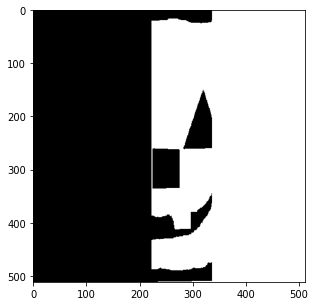

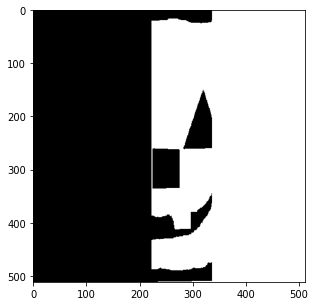

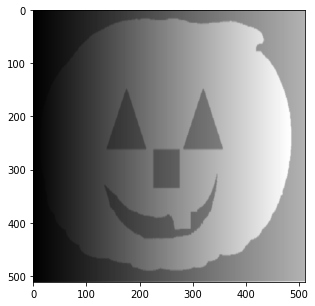

In [ ]:
## -- Seu código começa AQUI -- ##

abobora = cv.imread("abobora.tif", cv.IMREAD_GRAYSCALE)

(thresh, abobora_otsu) = cv.threshold(abobora, 255, 255, cv.THRESH_OTSU)

plt.figure(figsize = (5,5))
plt.imshow(abobora_otsu, cmap="gray")

print(abobora.shape)
##Fatiamento da imagem
##Como o problema da imagem está no eixo y da imagem, ela será fatiada somente em x
x=0
y=0
w_8 = 32
w_32 = 64
w_256 = 2
i = 0

for i in range(16) :
  crop = abobora[y:y+512, x:x+(i*w_32)].copy()
  (thresh, abobora_slice) = cv.threshold(crop, 255, 255, cv.THRESH_OTSU)
  ##print(abobora_slice)
  ##plt.figure(figsize = (5,5))
  ##plt.imshow(crop, cmap="gray")
  

plt.figure(figsize = (5,5))
plt.imshow(abobora_slice, cmap="gray")


plt.figure(figsize = (5,5))
plt.imshow(crop, cmap="gray")


## -- Seu código começa AQUI -- ##

### 3) Influência do ruído na segmentação

<center><img src="https://github.com/LAVI-USP/SEL0339-SEL5886_2021/raw/main/imagens/pratica_08/abobora_ruidosa_.png" width="256" height="256"></center>

<center><caption><b> Figura 3:</b> Imagem abobora_ruidosa.tif.</b></caption></center>

**Exercício:**

1. Binarize a imagem `abobora_ruidosa.tif` utilizando o método de Otsu para o cálculo do limiar;

2. Comente sobre o resultado;

3. Suavize a figura original usando filtro da média (escolha um tamanho apropriado para a máscara);

4. Aplique o método de Otsu novamente para o cálculo do limiar na imagem suavizada e binarize novamente.

103.0
94.0


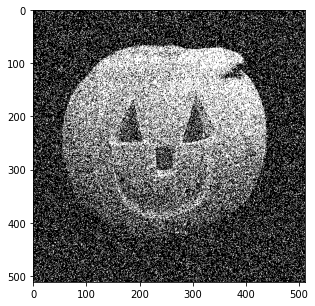

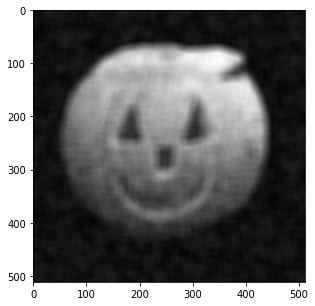

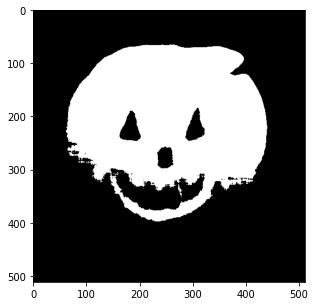

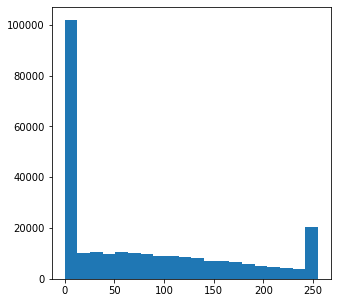

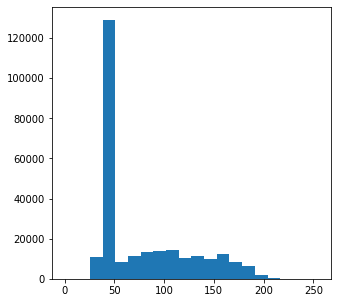

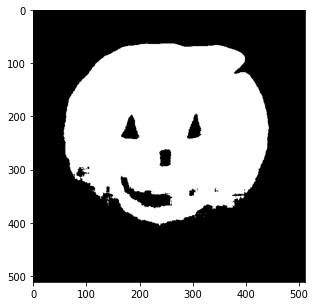

In [ ]:
## -- Seu código começa AQUI -- ##

noise_pump = cv.imread("abobora_ruidosa.tif", cv.IMREAD_GRAYSCALE)

(thresh1, otsu_pump) = cv.threshold(noise_pump, 128, 255, cv.THRESH_OTSU)

plt.figure(figsize = (5,5))
plt.imshow(otsu_pump, cmap="gray")

blur_pump = cv.blur(noise_pump, (20,20))

plt.figure(figsize = (5,5))
plt.imshow(blur_pump, cmap="gray")

(thresh2, otsu_blur_pump) = cv.threshold(blur_pump, 128, 255, cv.THRESH_OTSU)

plt.figure(figsize = (5,5))
plt.imshow(otsu_blur_pump, cmap="gray")

##Nota-se que depois da filtragem, a imagem binarizada obteve melhor resultado,
##isto se deve ao fato da remoção dos valores altos e baixos em nível de cinza
##dispersos na imagem, tornando eles mais próximos dos valores da sua vizinhança,
##o que permite que a binarização possa achar um valor melhor, podemos colocar o
##histograma das duas imagens para comparar como mostrado abaixo

plt.figure(figsize = (5,5))
noise_hist = plt.hist(noise_pump.flatten(), bins=20, range=(0,255))

plt.figure(figsize = (5,5))
noise_hist = plt.hist(blur_pump.flatten(), bins=20, range=(0,255))

##Nota-se a remoção do pico em 255 causado pelos ruídos que não existem na imagem
##original, sendo assim o threshold pode ser realizado em um ponto mais adequado
##pode-se observar esta diferença pelo valor do threshold determinado pelo método
##de Otsu, como mostrado abaixo

print(thresh1) ##103

print(thresh2) ##94

##pode-se tentar também realizar um threshold manual, a fim de encontrar 
##outro valor como mostrado abaixo

(thresh3, manual_pump) = cv.threshold(blur_pump, 80, 255, cv.THRESH_BINARY)

plt.figure(figsize = (5,5))
plt.imshow(manual_pump, cmap="gray")

##A visualização do histograma obteve resultado ligeiramente melhor, porém, o 
##método de Otsu permite uma forma não manual da binarização sem grande diferença
##da visualização manual.

## -- Seu código começa AQUI -- ##

### 4) Limiarização local
 
<center><img src="https://github.com/LAVI-USP/SEL0339-SEL5886_2021/raw/main/imagens/pratica_08/sudoku_.png" width="256" height="156"></center>
 
<center><caption><b> Figura 4:</b> Imagem sudoku.tif.</b></caption></center>
 
**Exercício:**
 
1. A imagem `sudoku.tif` possui uma iluminação não uniforme. Aplique a binarização pelo método de limiarização local nessa imagem variando os parâmetros `blockSize` (tamanho da janela) e `C` (constante a ser diminuída do média) de forma a se obter um resultado satisfatório. Comente sobre o resultado alcançado;
 
2. Aplique a binarização pelo método de Otsu e compare com o resultado obtido no item 1.
 
<details>   
<summary>
   <font size="3" color="darkblue"><b>Dicas:</b></font>
</summary>
 
* A limiarização local pode ser feita pela função [cv.adaptiveThreshold](https://docs.opencv.org/master/d7/d1b/group__imgproc__misc.html#ga72b913f352e4a1b1b397736707afcde3). Utilize o método adaptativo **cv.ADAPTIVE_THRESH_MEAN_C** que calcula o limiar como sendo a média de uma vizinhança **blockSize x blockSize** subtraída de uma constante **C**;
 
*Ex:*
``` python
# Limiarização local pela média
th3 = cv.adaptiveThreshold(img,maxVal,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,blockSize,C)
```

Text(0.5, 1.0, 'binarização de Otsu')

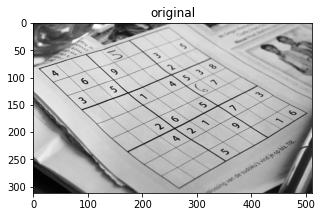

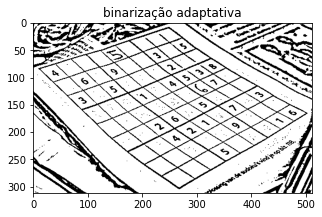

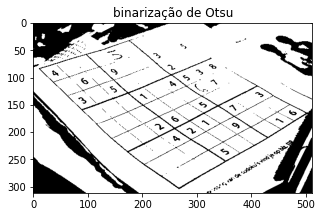

In [ ]:
## -- Seu código começa AQUI -- ##

n_p = cv.imread("sudoku.tif", cv.IMREAD_GRAYSCALE)

plt.figure(figsize = (5,5))
plt.imshow(n_p, cmap="gray")
plt.title("original")

n_p_thresh = cv.adaptiveThreshold(n_p, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 5)

plt.figure(figsize = (5,5))
plt.imshow(n_p_thresh, cmap="gray")
plt.title("binarização adaptativa")

##Desta forma é possível enxergar os númerso na imagem e distinguir eles do restante da imagem
##Com valores menores do blocksize o fundo da dolha confunde-se com os números e com valores
##menores da constante C ocasiona em números com muito ruído e indistinguíveis

(thresh, otsu_n_p) = cv.threshold(n_p, 128, 255, cv.THRESH_OTSU)

plt.figure(figsize = (5,5))
plt.imshow(otsu_n_p, cmap="gray")
plt.title("binarização de Otsu")

##Nota-se que pelo método de Otsu os pontos mais iluminados acabam sendo cortados da imagem
##Assim como manchas escuras surgem na parte menos iluminada, isto se deve ao fato que a 
##parte escura do lado iluminado é mais clara que o lado claro do lado escuro, desta forma,
##não há um threshold ótimo que consiga diferenciar os dois, porém, utilizando o método
##adaptativo, ele cria um threshold comparado com a sua vizinhança, com isto, a parte
##escura do lado iluminado, apesar de mais clara que o claro do lado escuro, ela é mais
##escura que a parte clara do lado escuro, com isto, comparado a sua vizinhança, ele é o
##mais escuro e consegue um threshold para diferenciá-lo.

## -- Seu código termina AQUI -- ##

### 5) K-means
 
**Exercício:**
 
1. Aplique o algoritmo de K-means na imagem `cores.jpeg` com $K=5$ para segmentar os cartões coloridos; Aplique o algoritmo no espaço de cores HSV, mais especificamente na matiz. 
 
2. Mostre o resultado e comente sobre. Por que $K=5$ pode ser uma boa escolha para a segmentação dos cartões quando se utiliza a matiz?
 
<details>   
<summary>
   <font size="3" color="darkblue"><b>Dicas:</b></font>
</summary>
 
* Você pode utilizar a função [cv.kmeans](https://docs.opencv.org/master/d5/d38/group__core__cluster.html#ga9a34dc06c6ec9460e90860f15bcd2f88) para a segmentação. Você pode utilizar 20 iterações e epsilon = 0.01 para o K-means.
 
* Para utilizar o K-means você deve passar a imagem como um vetor. O método `.ravel()` e `.flatten()` fazem isso. Além disso, a imagem deve estar em `float32`.
 
*Ex:*
``` python
criterio = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, nIteracao, epsilon)
 
ret,label,centers = cv.kmeans(myVector, nCluster, None, criterio, 5, cv.KMEANS_PP_CENTERS)
 
```

In [ ]:
## -- Seu código começa AQUI -- ##
img_bgr = cv.imread("cores.jpeg", cv.IMREAD_COLOR)

img_hsv = cv.cvtColor(img_bgr, cv.COLOR_BGR2HSV)

nCluster = 5
nIteracao = 15
epsilon = 0.01

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, nIteracao, epsilon)

##Flatten da imagem
imgk = img_hsv.reshape(-1,3)
imgk = np.float32(imgk)

##H, S, V = cv.split(img_hsv)

# K-means aqui
ret, label, centers = cv.kmeans(imgk, nCluster, None, criteria, 5, cv.KMEANS_PP_CENTERS)

centers = np.uint8(centers)

label = label.flatten()

## -- Seu código termina AQUI -- ##


# # Cálcula a área de cada label
# areas = np.empty_like(centers)
# for i in range(centers.shape[0]):
#   mask = np.where(label == i, 1, 0).reshape(img_hsv[:,:,0].shape)
#   areas[i] = mask.sum()

# # Ordem crescente
# areas = np.sort(areas,axis=0)

# # Cria uma mascara para cada label e aplica na imagem original
# segment = np.zeros_like(img_bgr, np.uint8)
# for i in range(centers.shape[0]):
#   mask = np.where(label == i, 1, 0).reshape(img_hsv[:,:,0].shape)
#   # Se for o fundo, atribua o valor 0
#   if(mask.sum() == areas[-1]):
#     mask[:] = 0
#   mask = cv.morphologyEx(np.uint8(mask), cv.MORPH_OPEN, cv.getStructuringElement(cv.MORPH_RECT,(3,3)))
#   mask = np.tile(np.expand_dims(mask,axis=-1),(1,1,3))
#   segment = segment + np.uint8(mask * img_bgr)

# # Mostra o resultado
# plt.figure(figsize=(10,10))
# plt.subplot(1,2,1)
# plt.imshow(cv.cvtColor(img_bgr,cv.COLOR_BGR2RGB));
# plt.subplot(1,2,2)
# plt.imshow(cv.cvtColor(segment,cv.COLOR_BGR2RGB));

## Continuação alternativa

Como o google Colab está acusando erro em trecho de código fora da área em que posso editar o código, ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all().
Criei alternativamente, estudando a documentação do kmeans um algoritmo que separa as labels, e imprimi cada uma das labels, utilizando mascaras, mostrando como o algoritmo foi capaz de identificar os papéis, porém não consegui alterar os parâmetros de forma a conseguir clusterizar cada um dos papéis, por este motivo o fundo ficou com dois clusters e três papéis mantiveram no mesmo cluster, mesmo assim, foi realizada a segmentação da imagem.

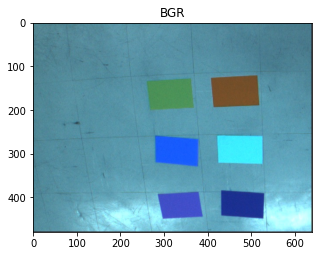

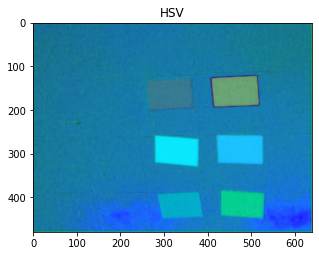

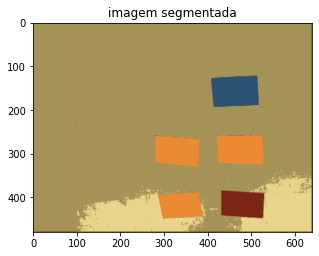

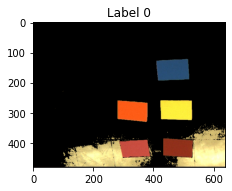

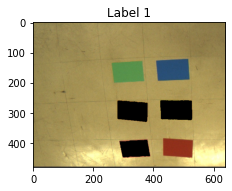

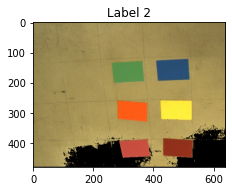

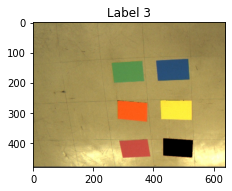

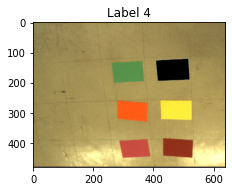

In [ ]:
img_bgr = cv.imread("cores.jpeg", cv.IMREAD_COLOR)

img_hsv = cv.cvtColor(img_bgr, cv.COLOR_BGR2HSV)

plt.figure(figsize = (5,5))
plt.imshow(img_bgr)
plt.title("BGR")

plt.figure(figsize = (5,5))
plt.imshow(img_hsv)
plt.title("HSV")

nCluster = 5
nIteracao = 20
epsilon = 0.01

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, nIteracao, epsilon)

##Flatten da imagem HSV
imgk = img_hsv.reshape(-1,3)
imgk = np.float32(imgk)

##H, S, V = cv.split(img_hsv)

# K-means aqui
ret, label, centers = cv.kmeans(imgk, nCluster, None, criteria, 15, cv.KMEANS_PP_CENTERS)

centers = np.uint8(centers)

label = label.flatten()


segmented_image = centers[label.flatten()]

segmented_image = segmented_image.reshape(img_hsv.shape)

plt.figure(figsize = (5,5))
plt.imshow(cv.cvtColor(segmented_image,cv.COLOR_HSV2RGB))
plt.title("imagem segmentada")

#Criando mascaras para cada label
##Cada uma das imagens está com um cluster a menos para identificá-lo
for cluster in range(nCluster) :
  masked_image = np.copy(img_hsv)

  masked_image = masked_image.reshape((-1, 3))

  ##cluster = 4

  masked_image[label == cluster] = [0, 0, 0]

  masked_image = masked_image.reshape(img_hsv.shape)

  plt.figure(figsize = (20,20))
  plt.subplot(1,nCluster, cluster + 1)
  plt.imshow(cv.cvtColor(masked_image,cv.COLOR_HSV2RGB))
  plt.title("Label " + str(cluster))


Alternativamente realizando a segmentação em BGR, porém a imagem torna-se mais ruidosa, distinguindo o fundo em diversos clusters.

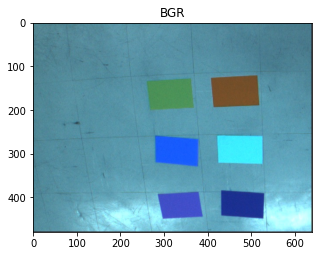

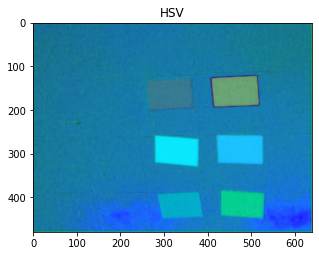

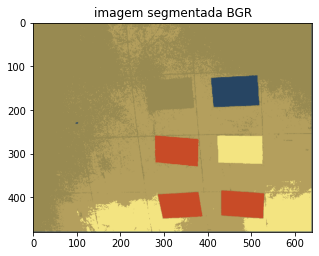

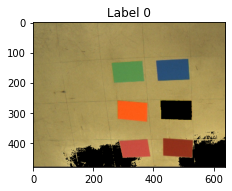

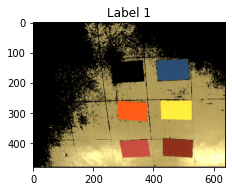

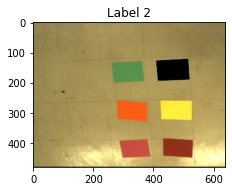

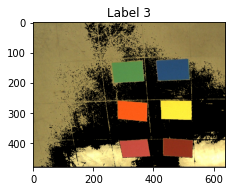

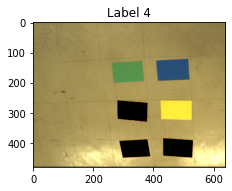

In [ ]:
img_bgr = cv.imread("cores.jpeg", cv.IMREAD_COLOR)

img_hsv = cv.cvtColor(img_bgr, cv.COLOR_BGR2HSV)

plt.figure(figsize = (5,5))
plt.imshow(img_bgr)
plt.title("BGR")

plt.figure(figsize = (5,5))
plt.imshow(img_hsv)
plt.title("HSV")

nCluster = 5
nIteracao = 20
epsilon = 0.01

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, nIteracao, epsilon)




##Flatten da imagem BGR
imgk = img_bgr.reshape(-1,3)
imgk = np.float32(imgk)

##H, S, V = cv.split(img_hsv)

# K-means aqui
ret, label, centers = cv.kmeans(imgk, nCluster, None, criteria, 15, cv.KMEANS_PP_CENTERS)

centers = np.uint8(centers)

label = label.flatten()


segmented_image = centers[label.flatten()]

segmented_image = segmented_image.reshape(img_hsv.shape)

plt.figure(figsize = (5,5))
plt.imshow(cv.cvtColor(segmented_image,cv.COLOR_BGR2RGB))
plt.title("imagem segmentada BGR")

#Criando mascaras para cada label
##Cada uma das imagens está com um cluster a menos para identificá-lo
for cluster in range(nCluster) :
  masked_image = np.copy(img_hsv)

  masked_image = masked_image.reshape((-1, 3))

  ##cluster = 4

  masked_image[label == cluster] = [0, 0, 0]

  masked_image = masked_image.reshape(img_hsv.shape)

  plt.figure(figsize = (20,20))
  plt.subplot(1,nCluster, cluster + 1)
  plt.imshow(cv.cvtColor(masked_image,cv.COLOR_HSV2RGB))
  plt.title("Label " + str(cluster))

Operando na imagem somente na matiz, o resultado obtido operando somente na matiz foi melhor que os anteriores, isto se deve ao fato que a matiz mede exatamente na escala o comprimento de onda do objeto, desta forma, independente da cor, a matiz consegue escalar em uma única dimensão as cores, desta forma, torna-se mais simples a clusterização, pois os clusters estão definidos sobre somente a cor, e uma vez que os cartões somente se diferenciam pela cor, ordenálos pela cor é uma boa alternativa, e por este motivo foram utilizados 5 clusters, pois há 5 cores facilmente distinguíveis, para utilizar mais clusters a fim de segmentar todos os cartões deveriam ser alterados valores das constantes a fim de determinar os melhores parâmetros para segmentação.

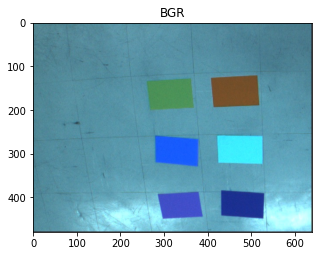

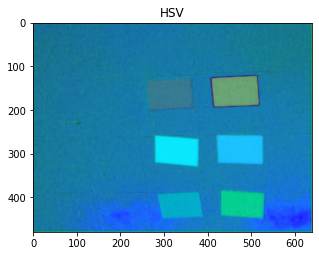

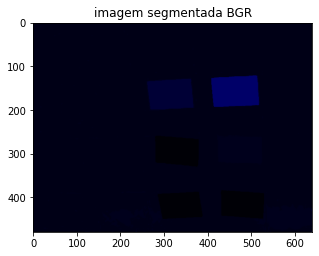

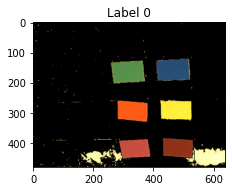

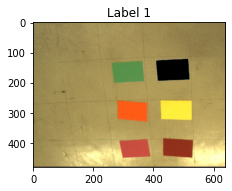

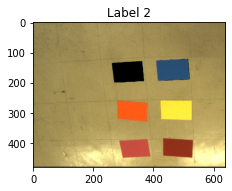

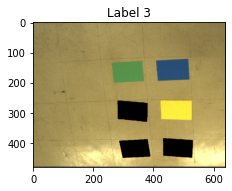

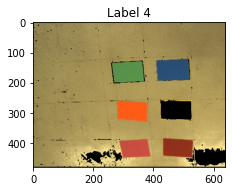

In [ ]:
img_bgr = cv.imread("cores.jpeg", cv.IMREAD_COLOR)

img_hsv = cv.cvtColor(img_bgr, cv.COLOR_BGR2HSV)

plt.figure(figsize = (5,5))
plt.imshow(img_bgr)
plt.title("BGR")

plt.figure(figsize = (5,5))
plt.imshow(img_hsv)
plt.title("HSV")

nCluster = 5
nIteracao = 20
epsilon = 0.01

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, nIteracao, epsilon)

##Separando somente a matiz
Hue, Saturation, Value = cv.split(img_hsv)

zeros = np.zeros(img_bgr.shape[:2], dtype = "uint8")

img_H = cv.merge([Hue, zeros, zeros])


##Flatten da imagem H
imgk = img_H.reshape(-1,3)
imgk = np.float32(imgk)

##H, S, V = cv.split(img_hsv)

# K-means aqui
ret, label, centers = cv.kmeans(imgk, nCluster, None, criteria, 15, cv.KMEANS_PP_CENTERS)

centers = np.uint8(centers)

label = label.flatten()


segmented_image = centers[label.flatten()]

segmented_image = segmented_image.reshape(img_hsv.shape)

plt.figure(figsize = (5,5))
plt.imshow(cv.cvtColor(segmented_image,cv.COLOR_BGR2RGB))
plt.title("imagem segmentada BGR")

#Criando mascaras para cada label
##Cada uma das imagens está com um cluster a menos para identificá-lo
for cluster in range(nCluster) :
  masked_image = np.copy(img_hsv)

  masked_image = masked_image.reshape((-1, 3))

  ##cluster = 4

  masked_image[label == cluster] = [0, 0, 0]

  masked_image = masked_image.reshape(img_hsv.shape)

  plt.figure(figsize = (20,20))
  plt.subplot(1,nCluster, cluster + 1)
  plt.imshow(cv.cvtColor(masked_image,cv.COLOR_HSV2RGB))
  plt.title("Label " + str(cluster))